In [60]:
import numpy as np
import pandas as pd
import math
import math
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

ImportError: No module named pydotplus

In [2]:
data = pd.read_csv('traceDMA.txt', sep=" ",names=["Port", "Size", "Class"])
feature = np.array(data.drop(["Class"], axis = 1))
label = np.array(data.drop(["Port", "Size"], axis = 1))

1.1 linear axis scaling

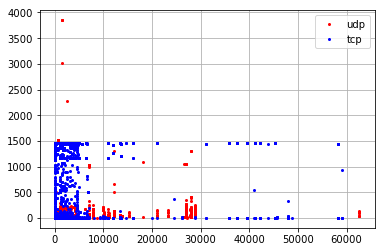

In [51]:
udpx , udpy , tcpx , tcpy = [] , [] , [] , []
for i in range(len(feature)) :
    if label[i] == "udp" :
        udpx.append(feature[i][0])
        udpy.append(feature[i][1])
    elif label[i] == "tcp" :
        tcpx.append(feature[i][0])
        tcpy.append(feature[i][1])
plt.plot(udpx,udpy,'ro',label='udp',markersize=2)
plt.plot(tcpx,tcpy,'bo',label='tcp',markersize=2)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

1.2 log axis scaling

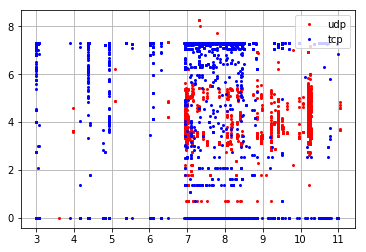

In [53]:
udpx , udpy , tcpx , tcpy = [] , [] , [] , []
for i in range(len(feature)) :
    logx = 0 if feature[i][0] == 0 else math.log(feature[i][0])
    logy = 0 if feature[i][1] == 0 else math.log(feature[i][1])
    if label[i] == "udp" :
        udpx.append(logx)
        udpy.append(logy)
    elif label[i] == "tcp" :
        tcpx.append(logx)
        tcpy.append(logy)
plt.plot(udpx,udpy,'ro',label='udp',markersize=2)
plt.plot(tcpx,tcpy,'bo',label='tcp',markersize=2)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

2.1 compute prediction accuracy, and how to generate graphical representations of decision trees.


In [56]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feature, label)
print "Training error : " + str(1-clf.score(feature,label))

Training error : 0.0002


In [57]:
tree.export_graphviz(clf,out_file='tree.dot') 